# Přísnost známkování na TIMSS 2019

Chci jen ověřit, jak vypadá distribuce známek a zdali v dotazníku jsou také nějaké relevantní otázky (ačkoli u desetiletých to asi nemá tolik smysl).

In [19]:
# nejake standardni importy
import os
import sys
import pyreadstat
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
# aby grafy byly rozumně čitelné na obrazovce
plt.rcParams['figure.dpi'] = 90
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['figure.figsize'] = 10, 5
#plt.ioff()

In [2]:
# cesta k datum
data_root = '/mnt/d/projects/idea/data'

In [3]:
sg19, sg19_meta = pyreadstat.read_sav(f'{data_root}/TIMSS/2019/CZ/asgczem7.sav')

In [4]:
sg19_meta.column_names_to_labels

{'IDCNTRY': 'Country ID - Numeric ISO Code',
 'IDPOP': 'Population ID',
 'IDGRADER': 'Standardized Grade ID',
 'IDGRADE': 'Grade ID',
 'IDBOOK': 'Student Test Booklet',
 'IDSCHOOL': 'School ID',
 'IDCLASS': 'Class ID',
 'IDSTUD': 'Student ID',
 'ASBG01': 'GEN\\SEX OF STUDENT',
 'ASBG02A': 'GEN\\DATE OF BIRTH\\MONTH',
 'ASBG02B': 'GEN\\DATE OF BIRTH\\YEAR',
 'ASBG03': 'GEN\\OFTEN SPEAK <LANG OF TEST> AT HOME',
 'ASBG04': 'GEN\\AMOUNT OF BOOKS IN YOUR HOME',
 'ASBG05A': 'GEN\\HOME POSSESS\\COMPUTER TABLET',
 'ASBG05B': 'GEN\\HOME POSSESS\\STUDY DESK',
 'ASBG05C': 'GEN\\HOME POSSESS\\OWN ROOM',
 'ASBG05D': 'GEN\\HOME POSSESS\\INTERNET CONNECTION',
 'ASBG05E': 'GEN\\HOME POSSESS\\MOBILE OWN',
 'ASBG05F': 'GEN\\HOME POSSESS\\<COUNTRY SPECIFIC>',
 'ASBG05G': 'GEN\\HOME POSSESS\\<COUNTRY SPECIFIC>',
 'ASBG05H': 'GEN\\HOME POSSESS\\<COUNTRY SPECIFIC>',
 'ASBG05I': 'GEN\\HOME POSSESS\\<COUNTRY SPECIFIC>',
 'ASBG06A': 'GEN\\WERE YOUR <PARENTS/GUARDIAN A> BORN IN <COUNTRY>',
 'ASBG06B': 'GEN\\WER

In [8]:
sg19['ASXG21c'].value_counts()

1.0    2289
2.0    1446
3.0     424
4.0      93
6.0      67
5.0      28
7.0       7
Name: ASXG21c, dtype: int64

In [9]:
sg19_meta.variable_value_labels['ASXG21c']

{1.0: '1',
 2.0: '2',
 3.0: '3',
 4.0: '4',
 5.0: '5',
 6.0: 'Verbal evaluation',
 7.0: 'We do not have this subject',
 9.0: 'Omitted'}

In [10]:
sg19['gr_matematika'] = np.where(sg19['ASXG21c'] < 5.5, sg19['ASXG21c'], np.nan)

In [13]:
foo = sg19[['gr_matematika', 'TOTWGT']].dropna()

In [14]:
dsw = DescrStatsW(foo['gr_matematika'], weights=foo['TOTWGT'])

In [15]:
dsw.std

0.8023978846030939

[Text(0.5, 0, 'Známka'), Text(0, 0.5, 'Relativní četnost')]

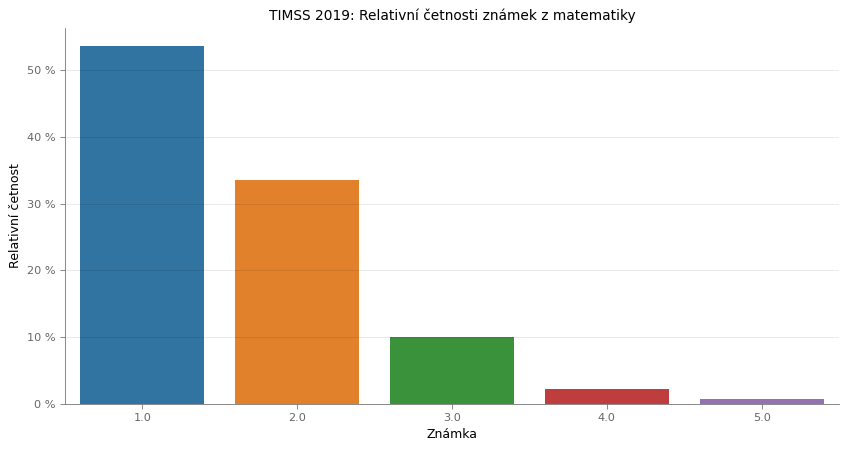

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7ff0b47202b0>>
Traceback (most recent call last):
  File "/mnt/d/projects/idea/code/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3731, in atexit_operations
    self._atexit_once()
  File "/mnt/d/projects/idea/code/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3714, in _atexit_once
    self.history_manager.end_session()
  File "/mnt/d/projects/idea/code/venv/lib/python3.10/site-packages/IPython/core/history.py", line 577, in end_session
    self.writeout_cache()
  File "/mnt/d/projects/idea/code/venv/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/mnt/d/projects/idea/code/venv/lib/python3.10/site-packages/IPython/core/history.py", line 60, in only_when_enabled
    return f(self, *a, **kw)
  File "/mnt/d/projects/idea/code/

In [20]:
foo = foo.groupby('gr_matematika')['TOTWGT'].sum().reset_index()
totwgt_total = foo['TOTWGT'].sum()
foo['rel_weight'] = 100 * foo['TOTWGT'] / totwgt_total
ax = sns.barplot(x='gr_matematika', y='rel_weight', data=foo)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(decimals=0, symbol=' %'))
ax.set_title('TIMSS 2019: Relativní četnosti známek z matematiky')
ax.set(xlabel='Známka', ylabel='Relativní četnost')